## Google Paly Store 应用数据集分析

作为最大手机操作系统Android的官方应用发布渠道，Google Paly Store有着巨大的市场份额、应用和开发者。

分析Google Paly Store的数据，可以推动应用业务取得成功。可以为开发人员提供开发的见解，以捕获更多的市场！

> 数据来源: [Kaggle:Google Play Store Apps](http://insideairbnb.com/get-the-data.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
apps = pd.read_csv('./googleplaystore.csv',encoding='utf8')
apps.info()

plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
color = sns.color_palette()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int64
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


## 数据总览

本次分析使用到了

App -> 应用名称

Category -> 应用分类

Rating -> 应用评分

Reviews -> 回复量

Installs -> 安装量

Type -> 应用类型

Price -> 价格

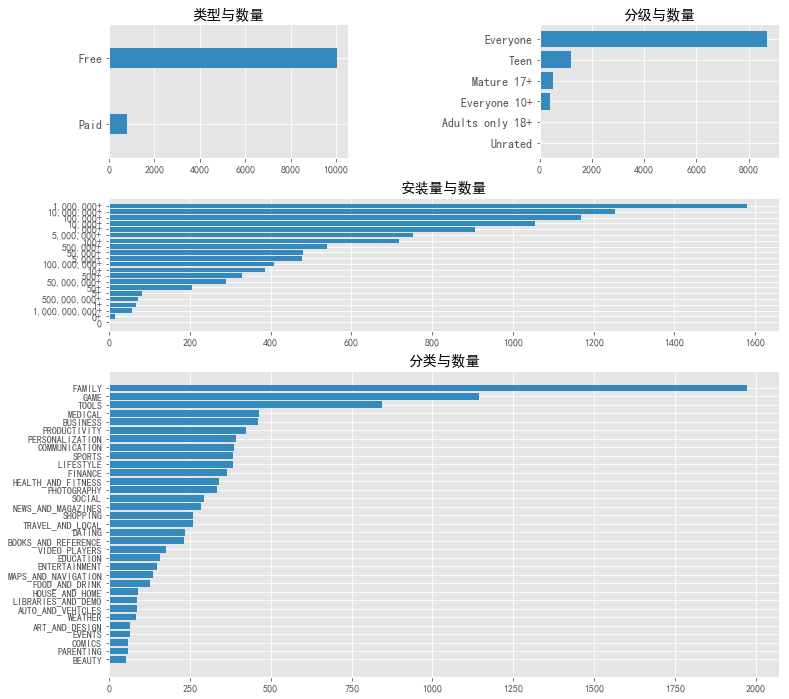

In [3]:
# 单变量分析
type_count = apps['Type'].groupby(apps['Type']).count().sort_values()
install_count = apps['Installs'].groupby(apps['Installs']).count().sort_values()
category_count = apps['Category'].groupby(apps['Category']).count().sort_values()
content_rate_count = apps['Content Rating'].groupby(apps['Content Rating']).count().sort_values()

fig = plt.figure(figsize=(12,12))

ax1 = plt.subplot2grid((4,2),(0,0),colspan=1)
ax1.barh(type_count.index,type_count.values,height=0.3,color = color[1])
plt.ylim(-0.5,1.5)
plt.yticks(fontsize=12)
plt.title('类型与数量')

ax2 = plt.subplot2grid((4,2),(0,1),colspan=1)
ax2.barh(content_rate_count.index,content_rate_count.values,color = color[1])
plt.yticks(fontsize=12)
plt.title('分级与数量')

ax3 = plt.subplot2grid((4,2),(1,0),colspan=2)
ax3.barh(install_count.index,install_count.values,color = color[1])
plt.title('安装量与数量')

ax4 = plt.subplot2grid((4,2),(2,0),colspan=2,rowspan=2)
ax4.barh(category_count.index,category_count.values,color = color[1])
plt.title('分类与数量')
    
plt.subplots_adjust(hspace=0.3,wspace=0.8)

Text(0.5, 1.0, '评分箱线图')

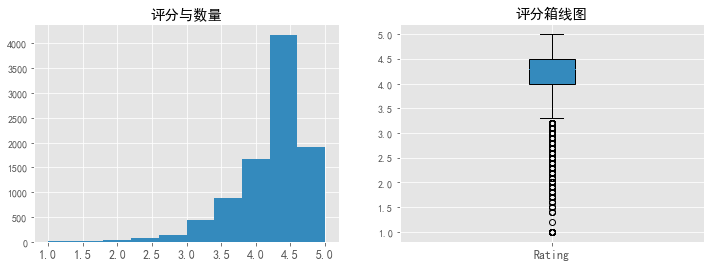

In [4]:
fig = plt.figure(figsize=(12,4))

ax1 = plt.subplot2grid((1,2),(0,0),colspan=1)
apps['Rating'].hist(color=color[1])
plt.xticks(fontsize=12)
plt.title('评分与数量')

ax2 = plt.subplot2grid((1,2),(0,1),colspan=1)
plt.boxplot(apps['Rating'].dropna().values,labels=['Rating'],patch_artist=True,showfliers=True,boxprops=dict(facecolor=color[1]))
plt.xticks(fontsize=12)
plt.title('评分箱线图')

## 单变量分析

1. 在应用类型的统计中，绝大多数的应用是免费(Free)安装的，而少数应用是需要付费购买(Paid)安装的；由于数据中未标识是否有内购和广告，所以在类型统计中，Free占比远比Paid要高。
2. 绝大多数的应用分级处在适合全年龄段(Everyone),其次是青少年(Teen)，但这也只占较少一部分；而按手机App实际的使用来说，绝大多数的App也是适合于全年龄段的，较符合预期。
3. 在安装量统计上安装量在100万以上的应用最多，其次是安装量在1000万以上的应用,而安装量最多的10亿以上和5亿以上的应用数量最少；这也说明要开发一个占据市场份额较大的App实属难得。
4. 在应用分类统计中，家庭类的App最多，而游戏类、工具类、医疗类、商务类占比也很高。
5. 在应用评分统计中，绝大多少的App处于4-4.5的范围内，而箱线图也显示有大量离散值，说明评分还是有着双方主观因素的影响。

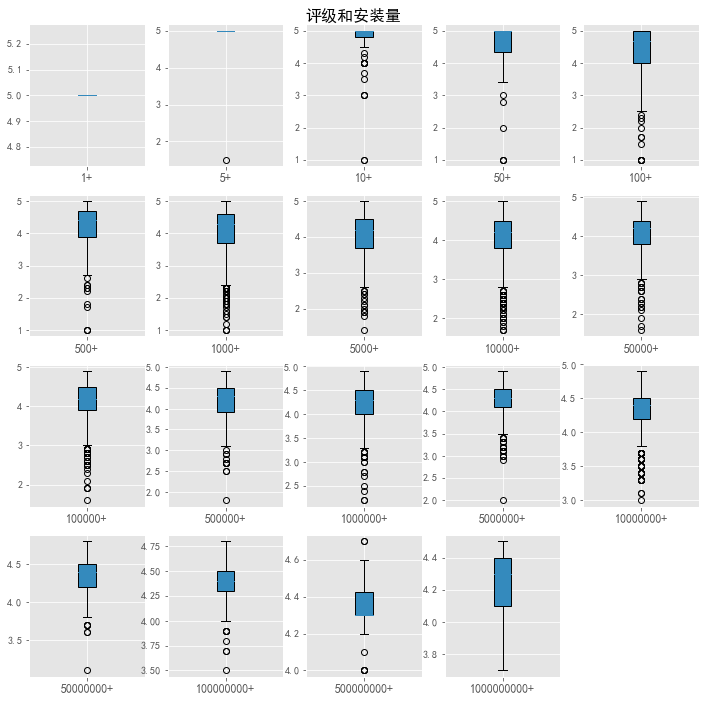

In [5]:
def get_num(num_str):
    return float(re.sub('[,\+]','',num_str))
apps['Install Num'] = apps['Installs'].dropna().apply(get_num)
rate_install = apps['Rating'].dropna().groupby(apps['Install Num'])

fig=plt.figure(figsize=(12,12))
fig.suptitle('评级和安装量',fontsize=16,x=0.5,y=0.9)

count = 1
for k,v in rate_install:
    plt.subplot(4,5,count)
    count += 1
    plt.boxplot(v,labels=['{0}+'.format(int(k))],patch_artist=True,showfliers=True,boxprops=dict(facecolor=color[1]))
    plt.xticks(fontsize=12)

## 安装量和评分

首先是安装量最多的10亿+级和安装量5亿+级的App，评分大部分处于4分以上，10亿+级的App没有离散点，5亿+级的App有部分离散点，评分趋于稳定，且较高。
其余的各安装量级的App，呈现安装量越少，离散值越多，且离散点都是处于箱线之下，这反映出，App安装量越少的开发者们，越容易把控不住App的品质。

而安装量1+和5+数据较少，不具备统计意义，故不考虑。

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 338 to 4247
Data columns (total 14 columns):
App               200 non-null object
Category          200 non-null object
Rating            200 non-null float64
Reviews           200 non-null int64
Size              200 non-null object
Installs          200 non-null object
Type              200 non-null object
Price             200 non-null object
Content Rating    200 non-null object
Genres            200 non-null object
Last Updated      200 non-null object
Current Ver       200 non-null object
Android Ver       200 non-null object
Install Num       200 non-null float64
dtypes: float64(2), int64(1), object(11)
memory usage: 23.4+ KB


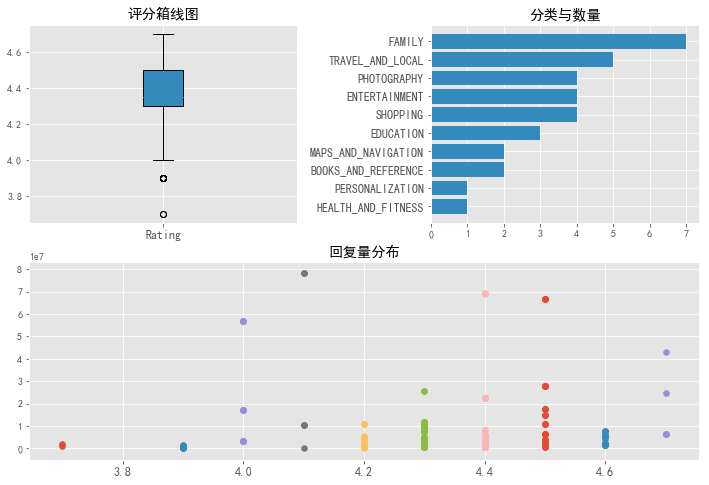

In [6]:
# 免费软件分析
free_tops = apps[apps['Type'] == 'Free'].sort_values(by=['Install Num'],ascending=False).head(200)
free_tops.info()

ftops_category = free_tops['Category'].groupby(free_tops['Category']).count().sort_values().head(10)
ftops_rate_review = free_tops['Reviews'].groupby(free_tops['Rating'])

fig = plt.figure(figsize=(12,8))

ax1 = plt.subplot2grid((2,2),(0,0),colspan=1)
ax1.boxplot(free_tops['Rating'].dropna().values,labels=['Rating'],patch_artist=True,showfliers=True,boxprops=dict(facecolor=color[1]))
plt.xticks(fontsize=12)
plt.title('评分箱线图')

ax2 = plt.subplot2grid((2,2),(0,1),colspan=1)
ax2.barh(ftops_category.index,ftops_category.values,color=color[1])
plt.yticks(fontsize=12)
plt.title('分类与数量')

ax3 = plt.subplot2grid((2,2),(1,0),colspan=2)
for x,y in ftops_rate_review:
    x_list = [x] * len(y)
    ax3.scatter(x_list,y)
plt.xticks(fontsize=12)
plt.title('回复量分布')

plt.subplots_adjust(wspace=0.5)

## 免费软件分析

- 本次选取了安装量最多的前200个免费App。
- 首先分析App评分，介于之前分析过安装量与评分的关系，这里的结论也符合之前，下载量最多的App评分稳定和离散点较少。
- 其次是在这些最受欢的App中，家庭分类的App最多，旅游和本地类的其次，排第三的是照片处理App。
- 在回复量与评分的关系中，评分高的App的回复数量偏少，只有少数App能有极高的回复量和高评分，这也说明，这些App才是质量和市场上的领军者。

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 2241 to 4946
Data columns (total 15 columns):
App               200 non-null object
Category          200 non-null object
Rating            200 non-null float64
Reviews           200 non-null int64
Size              200 non-null object
Installs          200 non-null object
Type              200 non-null object
Price             200 non-null object
Content Rating    200 non-null object
Genres            200 non-null object
Last Updated      200 non-null object
Current Ver       199 non-null object
Android Ver       200 non-null object
Install Num       200 non-null float64
Price Num         200 non-null float64
dtypes: float64(3), int64(1), object(11)
memory usage: 25.0+ KB


(array([2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 7 Text xticklabel objects>)

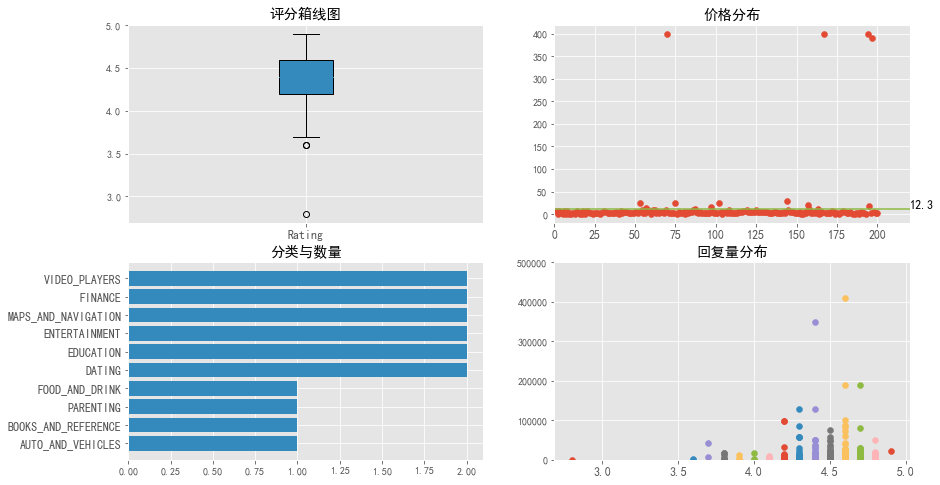

In [7]:
def get_price(price_str):
    return float(re.sub(r'\$',r'',price_str))

paid_tops = apps[apps['Type'] == 'Paid'].sort_values(by=['Install Num'],ascending=False).head(200)
paid_tops['Price Num'] = paid_tops['Price'].apply(get_price)
paid_tops.info()

ptops_category = paid_tops['Category'].groupby(paid_tops['Category']).count().sort_values().head(10)
ptops_rate_review = paid_tops['Reviews'].groupby(paid_tops['Rating'])
ptops_price = paid_tops['Price Num']

fig = plt.figure(figsize=(14,8))

ax1 = plt.subplot2grid((2,2),(0,0),colspan=1)
plt.boxplot(paid_tops['Rating'].dropna().values,labels=['Rating'],patch_artist=True,showfliers=True,boxprops=dict(facecolor=color[1]))
plt.xticks(fontsize=12)
plt.title('评分箱线图')

ax2 = plt.subplot2grid((2,2),(0,1),colspan=1)
ax2.scatter(np.arange(1,201,1),ptops_price)
ax2.plot([0,220],[ptops_price.mean(),ptops_price.mean()],color=color[5])
ax2.set_xlim(0,220)
plt.xticks(fontsize=12)
plt.text(220,13,'{:.1f}'.format(ptops_price.mean()),fontsize=12)
plt.title('价格分布')

ax3 = plt.subplot2grid((2,2),(1,0),colspan=1)
ax3.barh(ptops_category.index,ptops_category.values,color=color[1])
plt.yticks(fontsize=12)
plt.title('分类与数量')

ax4 = plt.subplot2grid((2,2),(1,1),colspan=1)
for x,y in ptops_rate_review:
    x_list = [x] * len(y)
    ax4.scatter(x_list,y)
ax4.set_ylim(0,500000)
plt.title('回复量分布')

plt.xticks(fontsize=12)

## 付费软件分析

- 本次选取了安装量最多的前200个付费App。
- 同前面免费软件一样，App评分依然是保持着稳定和较少的离散点。
- 针对付费App，这里分析了价格分布，所取200款App的平均价格是\\$12.3,绝大多数App售价都在平均线下，只有几款App售价会高达\\$400这一档次；结合这次所选的是最受欢迎的前200个App，可见，高额的价格不会影响优质App的销售。
- 其次是在这些最受欢的App中，分类分布交平均，主体还是以工具类、商务类和生活类的为主。
- 在回复量与评分的关系中，回复数量类似正态分布，大多数高回复量的App评分趋于中段；与免费App一样也是，当回复量到一定阶段，提高评分也是更加困难的。